### Project description:

One of the jobs that all teachers have in common is evaluating students. Whether you use exams, homework assignments, quizzes, or projects, you usually have to turn students’ scores into a letter grade at the end of the term. This often involves a bunch of calculations that you might do in a spreadsheet. Instead, you can consider using Python and pandas.

One problem with using a spreadsheet is that it can be hard to see when you make a mistake in a formula. Maybe you selected the wrong column and put quizzes where exams should go. Maybe you found the maximum of two incorrect values. To solve this problem, you can use Python and pandas to do all your calculations and find and fix those mistakes much faster.

In this project, we will learn how to:

- Load and explore data from multiple sources with pandas
- Clean DataFrame using Numpy and Pandas
- Merge data in a pandas DataFrame
- Calculate grades, filter and group in a pandas DataFrame
- Plotting Summary Statistics

Once we complete these steps, we’ll have the grades in a format that we should be able to upload to the school’s student administration system.

Click the link below for the project reference:
https://realpython.com/pandas-project-gradebook/

## Below are the code scripts & steps for the project

In [188]:
# import all packages
import numpy as np
import pandas as pd
import re
# import the missed libraries
from pathlib import Path
import matplotlib.pyplot as plt
import scipy.stats

# Save the path in DATA_FOLDER variable to be reused
HERE = Path().resolve()
DATA_FOLDER = HERE / "materials-pandas-gradebook-project/data"

### Loading and exploring the data

In [165]:
# hw_exam_grades dataframe, this dataframe is from the homework and exam grading service.
# Each student has SID, first name, and last name. In addition, there are three values reported for each assignment and 
# exam you gave which are: score the student received, The maximum score for that assignment, and 
# The time the student submitted the assignment
hw_exam_grades = pd.read_csv('materials-pandas-gradebook-project/data/hw_exam_grades.csv')
hw_exam_grades.name = 'hw_exam_grades' # to be used later in data cleaning
# roster dataframe, it contains roster information for the class. This would come from your student administration system
# Each student’s ID number, name, NetID, and email address as well as the section of the class 
# that they belong to. In this term, you taught one class that met at different times,
# and each class time has a different section number
roster = pd.read_csv('materials-pandas-gradebook-project/data/roster.csv')
roster.name = 'roster' # to be used later in data cleaning
# Quiz dataframe, 
# Each student has a last name, first name, email, and quiz grade. 
# Notice that the maximum possible quiz score isn’t stored in this table. and will see how to
# supply that information later on.

# Use the pathlib library to import the quiz's datasets in bulk
quiz_grades = pd.DataFrame()
for file_path in DATA_FOLDER.glob('quiz_*_grades.csv'):
    quiz_name = ' '.join(file_path.stem.title().split('_')[:2])
    # title() returns the title cased version of the string,
    # stem attribute extracts the file name, using the pathlib library
    quiz = pd.read_csv(file_path,
                       usecols=['Email', 'Grade'],
                       index_col=['Email']) # make it index to prevent repeaded cols
    quiz.rename(columns={'Grade':quiz_name}, inplace=True)
    quiz_grades = pd.concat([quiz_grades, quiz], axis='columns')
# Lastly reset the index as we need to access the email column later.
quiz_grades.reset_index(inplace=True)
quiz_grades.name = 'quiz_grades' # to be used later in data cleaning

# quiz_1_grades
# quiz_grades
# hw_exam_grades

### Clean DataFrame using Numpy and Pandas


### Data cleaning
##### 1- Trim/Strip space within string values
##### 2- Treat Empty/Null values and report nulls
##### 3- Treat duplicated values
##### 4- Concatenate or split columns, and unify the data types if needed
##### 5- Unify the unique ID (student ID)
##### 6- Sort data
##### 7- Check the total number of students



In [166]:
# functions initiation

#     -------------------------------------------------
# 1- Trim/Strip space within string values
#     -------------------------------------------------
def remove_col_str_space(df, col):
    df[col] = df[col].str.strip()
    return df

#     -------------------------------------------------
# 2- Treat Empty/Null values and report nulls
#     -------------------------------------------------
def replace_col_empty_value(df,col):
    return df[col].replace('',np.nan,inplace=True)
def replace_col_nan_value(df,col):
    return df[col].fillna(0,inplace=True)
    # Note' Blank in numbers fields is a Nan by default in dataframes
# Report Null values in dataframe columns
def checknull(col, mask):
    return mask[col].unique()
def reportnulls(df):
    # masking (True/False)
    mask = df.isnull()
    counter=0
    for col in mask.columns:
        if True in checknull(col, mask):
            print('Column: ',col,' contains Null value')
            counter = 1
    if counter == 0:
        print('There is no Nulls in: ',df.name)
        
#     -------------------------------------------------
# 3- Treat duplicated values
#     -------------------------------------------------
def retrieve_col_duplicated_value(df,col):
    return df[df[col].duplicated()]

# functions calling to clean & prepare the datasets

# Trim/Strip space within string values
# String columns in dataframes
string_col_hw_exam_grades = hw_exam_grades[['First Name','Last Name','SID']]
string_col_roster = roster[['Name','NetID','Email Address']]
string_col_quiz_grades = quiz_grades[['Email']]
[remove_col_str_space(hw_exam_grades, i) for i in string_col_hw_exam_grades.columns]
[remove_col_str_space(roster, i) for i in string_col_roster.columns]
remove_col_str_space(quiz_grades, string_col_quiz_grades.columns[0])

# Treat Empty/Null values and report nulls
# targeted df to report nulls
reportnulls(hw_exam_grades)
reportnulls(roster)
reportnulls(quiz_grades)

# replace the '' values with nan in a certain columns
[replace_col_empty_value(hw_exam_grades,i) for i in hw_exam_grades.columns]
[replace_col_empty_value(roster,i) for i in roster.columns]
[replace_col_empty_value(quiz_grades,i) for i in quiz_grades.columns]

# replace the nan values with zero in a certain columns
numiric_col_hw_exam_grades = hw_exam_grades[
                             ['Homework 1', 'Homework 1 - Max Points',
                              'Homework 2', 'Homework 2 - Max Points', 
                              'Homework 3', 'Homework 3 - Max Points', 
                              'Homework 4', 'Homework 4 - Max Points', 
                              'Homework 5', 'Homework 5 - Max Points', 
                              'Homework 6', 'Homework 6 - Max Points', 
                              'Homework 7', 'Homework 7 - Max Points', 
                              'Homework 8', 'Homework 8 - Max Points', 
                              'Homework 9', 'Homework 9 - Max Points',
                              'Homework 10', 'Homework 10 - Max Points',
                              'Exam 1', 'Exam 1 - Max Points',
                              'Exam 2', 'Exam 2 - Max Points',
                              'Exam 3', 'Exam 3 - Max Points']]
numiric_col_quiz_grades = quiz_grades[['Quiz 1', 'Quiz 2', 'Quiz 3',
                                       'Quiz 4', 'Quiz 5']]
[replace_col_nan_value(hw_exam_grades,i) for i in numiric_col_hw_exam_grades.columns]
print(reportnulls(hw_exam_grades),f', so, nan value in {hw_exam_grades.name} has been changed to zero') # just to do a quick check
[replace_col_nan_value(roster,'Section')]
[replace_col_nan_value(quiz_grades,i) for i in numiric_col_quiz_grades]

# Treat duplicated values
duplicated_col = retrieve_col_duplicated_value(hw_exam_grades,'SID')
duplicated_col2 = retrieve_col_duplicated_value(roster,'NetID')
if len(duplicated_col) & len(duplicated_col2) == 0:
    print('there is no duplicated unique ID\'s')
else:
    print('Oops, you have got some duplicated id\'s be it: '+duplicated_col+duplicated_col2)
    # We scaped the quizz_number_grade as it has no unique value
    
#     -------------------------------------------------
# 4- Concatenate or split columns, and unify the data type if needed
#     -------------------------------------------------
# make sure firstly, the names format is (LastName, FirstName), only one keyword, no spaces no more keywords or symbols
hw_exam_grades[hw_exam_grades['First Name'].str.match(r'(\w+)')]
hw_exam_grades[hw_exam_grades['Last Name'].str.match(r'(\w+)')]
    #It should be the same length of the origin df
# Concatenate
hw_exam_grades['Name'] = hw_exam_grades['Last Name']+', '+hw_exam_grades['First Name']
# # Unify the data type if needed
datetime_columns = ['Homework 1 - Submission Time',
                'Homework 2 - Submission Time',
                'Homework 3 - Submission Time',
                'Homework 4 - Submission Time',
                'Homework 5 - Submission Time',
                'Homework 6 - Submission Time',
                'Homework 7 - Submission Time',
                'Homework 8 - Submission Time',
                'Homework 9 - Submission Time',
                'Homework 10 - Submission Time',
                'Exam 1 - Submission Time',
                'Exam 2 - Submission Time',
                'Exam 3 - Submission Time']
# get rid of the hour times
hw_exam_grades[datetime_columns] = hw_exam_grades[datetime_columns].apply(lambda x: x.str.replace(r'\s.*', ''))
# convert to datetime
hw_exam_grades[datetime_columns] = hw_exam_grades[datetime_columns].apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d'))

#     -------------------------------------------------
# # 5- Unify the unique ID (student ID and email)
#     -------------------------------------------------
# unify the identifier names and emails
roster.rename(columns={'NetID':'Identifier'}, inplace=True)
hw_exam_grades.rename(columns={'SID':'Identifier'}, inplace=True)
roster.rename(columns={'Email Address':'Email'}, inplace=True)
# lower case all identifiers and emails
roster['Identifier'] = roster['Identifier'].str.lower()
hw_exam_grades['Identifier'] = hw_exam_grades['Identifier'].str.lower()
roster['Email'] = roster['Email'].str.lower()

#     -------------------------------------------------
# 6- Sort data
#     -------------------------------------------------
# will sort the final df at the end

#     -------------------------------------------------
# 7- Check the total number of students
#     -------------------------------------------------
# they should be all 150
print(len(hw_exam_grades))
print(len(roster))
print(len(quiz_grades))



Column:  Homework 1  contains Null value
There is no Nulls in:  roster
There is no Nulls in:  quiz_grades
There is no Nulls in:  hw_exam_grades
None , so, nan value in hw_exam_grades has been changed to zero
there is no duplicated unique ID's
150
150
150


C:\Users\sahal\AppData\Local\Temp\ipykernel_18220\2349823234.py:115: FutureWarning: The default value of regex will change from True to False in a future version.
  hw_exam_grades[datetime_columns] = hw_exam_grades[datetime_columns].apply(lambda x: x.str.replace(r'\s.*', ''))


### Merge data in a pandas DataFrame

In [168]:
# Merge based on the new dataframes (quiz_grades)
joined_hw_exam_grades_roster = pd.merge(hw_exam_grades, roster, how='inner', on='Identifier')
joined_hw_exam_grades_roster.drop(['Name_y', 'ID'], axis='columns', inplace=True)
joined_hw_exam_grades_roster = joined_hw_exam_grades_roster.rename(columns={'Name_x':'Name'})
joined_final = pd.merge(joined_hw_exam_grades_roster, quiz_grades, how='inner', on='Email')


In [169]:
"""
There are three mistakes occured during "commit 3" to be fixed, and the fixed code will be uploaded on "commit 3 fixed".

1- Use the pathlib library to import the quiz's datasets in bulk
2- Rename and merge based on the new dataframes
3- Fix the scoring calculation as it is not one max point for homeworks, exams, or quizzes
"""

'\nThere are three mistakes occured during "commit 3" to be fixed, and the fixed code will be uploaded on "commit 3 fixed".\n\n1- Use the pathlib library to import the quiz\'s datasets in bulk\n2- Rename and merge based on the new dataframes\n3- Fix the scoring calculation as it is not one max point for homeworks, exams, or quizzes\n'

### Calculate grades, filter and group in a pandas DataFrame

- Exams
- Homework
- Quizzes

Each of these categories is assigned a weight toward the students’ final score. For your class this term, you assigned the following weights:

Category    ___        Weight

Exam 1 Score		__0.05

Exam 2 Score		__0.10

Exam 3 Score		__0.15

Quiz Score	     	__0.30

Homework Score		__0.40

Total               ___1.00 (100%)

In [197]:
# Fix the scoring calculation as it is not one max point for homeworks, exams, or quizzes
# ================================
# Calculating the Exam Total Score
# ================================
n_exams = 3
for n in range(1, n_exams+1):
    joined_final[f'Exam {n} Score'] = (joined_final[f'Exam {n}']/joined_final[f'Exam {n} - Max Points'])

# ================================
# Calculating the Homework Scores
# ================================
# First approach by total as below,
homework_scores = joined_final.filter(regex=r'^Homework \d\d?$', axis=1)
homework_max_points = joined_final.filter(regex=r'^Homework \d\d? - M', axis=1)
sum_homework_scores = homework_scores.sum(axis=1)
sum_homework_max_points = homework_max_points.sum(axis=1)
joined_final['Total Homework'] = (sum_homework_scores/sum_homework_max_points)
# Second approach by average as below,
hw_max_renamed = homework_max_points.set_axis(homework_scores.columns, axis=1)
#     You set the columns axis to have the same names as the columns in homework_scores, then,
average_hw_scores = (homework_scores / hw_max_renamed).sum(axis=1)
#   In this code, you calculate the average_hw_scores by dividing each homework score by its respective maximum points,then,
joined_final["Average Homework"] = average_hw_scores / (homework_scores.shape[1])
    # You use DataFrame.shape to get the number of assignments from homework_scores. 
    # Like a NumPy array, DataFrame.shape returns a tuple of (n_rows, n_columns)
joined_final['Homework Score'] = joined_final[['Average Homework','Total Homework']].max(axis=1)
    # calculate the higher score between the two approaches and go with it.

# ================================
# Calculating the Quiz Scores
# ================================
# First approach by total as below,
Quiz_scores = joined_final.filter(regex=r'^Quiz \d\d?$', axis=1)
Quiz_max_point = pd.Series({"Quiz 1": 11, "Quiz 2": 15, "Quiz 3": 17, "Quiz 4": 14, "Quiz 5": 12})
sum_quiz_scores = Quiz_scores.sum(axis=1)
sum_quiz_max_point = Quiz_max_point.sum()
joined_final['Total quizzes'] = sum_quiz_scores/sum_quiz_max_point
# Second approach by average as below,
avg_quiz_scores = (Quiz_scores/Quiz_max_point).sum(axis=1)
joined_final['Average quizzes'] = avg_quiz_scores/Quiz_scores.shape[1]
joined_final['Quiz Score'] = joined_final[['Average quizzes','Total quizzes']].max(axis=1)
# ================================
# Calculating the letter grade
# ================================
weightings = pd.Series({
    'Exam 1 Score':0.05,
    'Exam 2 Score':0.10,
    'Exam 3 Score':0.15,
    'Quiz Score':0.30,
    'Homework Score':0.40
})
joined_final['Final score'] = (joined_final[weightings.index]*weightings).sum(axis=1)
joined_final['Ceiling score'] = np.ceil(joined_final['Final score']*100) # تقريب لاقرب عدد
def final_grade(x):
    if x>=90:
        return 'A'
    elif x>=80:
        return 'B'
    elif x>=70:
        return 'C'
    elif x>=60:
        return 'D'
    else:
        return 'F'
    
joined_final['Final Grade'] = joined_final['Ceiling score'].apply(lambda x: final_grade(x))

# ================================
# Groupby section and sort by 1st last name and save the students grades to files
# ================================
for section, table in joined_final.groupby('Section'):
    section_file = DATA_FOLDER/f'Section {section} Grades.csv'
    number_students = table.shape[0]
    print(f'there are {number_students} in section {section} saved to "{section_file}" file.')
    table.sort_values(by=['Last Name', 'First Name'])
    table.to_csv(section_file)
name = joined_final.pop('Name')
joined_final.insert(0,'Name', name)

joined_final.columns


there are 56 in section 1 saved to "C:\Users\sahal\Workspace\Gradebook\materials-pandas-gradebook-project\data\Section 1 Grades.csv" file.
there are 51 in section 2 saved to "C:\Users\sahal\Workspace\Gradebook\materials-pandas-gradebook-project\data\Section 2 Grades.csv" file.
there are 43 in section 3 saved to "C:\Users\sahal\Workspace\Gradebook\materials-pandas-gradebook-project\data\Section 3 Grades.csv" file.


Index(['Name', 'First Name', 'Last Name', 'Identifier', 'Homework 1',
       'Homework 1 - Max Points', 'Homework 1 - Submission Time', 'Homework 2',
       'Homework 2 - Max Points', 'Homework 2 - Submission Time', 'Homework 3',
       'Homework 3 - Max Points', 'Homework 3 - Submission Time', 'Homework 4',
       'Homework 4 - Max Points', 'Homework 4 - Submission Time', 'Homework 5',
       'Homework 5 - Max Points', 'Homework 5 - Submission Time', 'Homework 6',
       'Homework 6 - Max Points', 'Homework 6 - Submission Time', 'Homework 7',
       'Homework 7 - Max Points', 'Homework 7 - Submission Time', 'Homework 8',
       'Homework 8 - Max Points', 'Homework 8 - Submission Time', 'Homework 9',
       'Homework 9 - Max Points', 'Homework 9 - Submission Time',
       'Homework 10', 'Homework 10 - Max Points',
       'Homework 10 - Submission Time', 'Exam 1', 'Exam 1 - Max Points',
       'Exam 1 - Submission Time', 'Exam 2', 'Exam 2 - Max Points',
       'Exam 2 - Submission Time'

### Plotting Summary Statistics

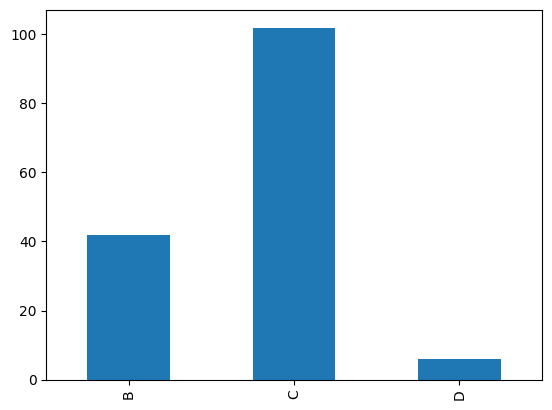

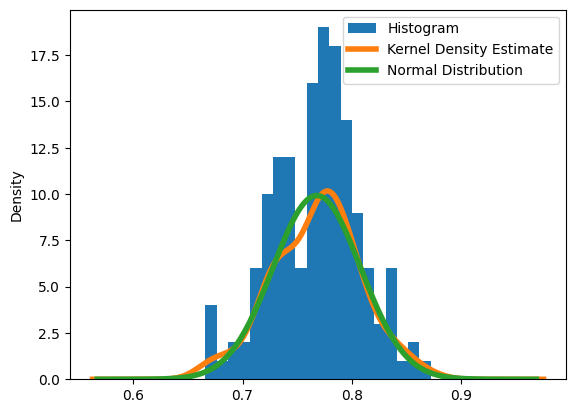

,Identifier,Name,Homework Score,Quiz Score,Exam 1 Score,Exam 2 Score,Exam 3 Score,Final score,Final Grade
74,ksb85997,"Brown, Kelsey",0.833516,0.754367,0.80,0.69,0.83,0.793217,B
32,cxc08121,"Campbell, Charles",0.796857,0.811594,0.66,0.96,1.00,0.841221,B
125,sxj49423,"Jones, Sarah",0.724324,0.942029,0.89,0.68,0.94,0.825838,B
122,sxw76890,"Weber, Samuel",0.860811,0.623188,0.79,0.96,0.86,0.795781,B
120,rcf61653,"Flores, Russell",0.836486,0.715452,0.64,0.78,0.98,0.806230,B
...,...,...,...,...,...,...,...,...,...
43,djb29817,"Beck, David",0.737758,0.536509,0.91,0.74,0.65,0.673056,D
108,oxr30270,"Rush, Oscar",0.755405,0.521739,0.74,0.80,0.66,0.674684,D
124,sxv18182,"Vasquez, Sara",0.801351,0.449275,0.64,0.73,0.75,0.672823,D
53,hxw92728,"Webb, Heather",0.701351,0.652174,1.00,0.61,0.62,0.680193,D


In [202]:
# plotting the grades (A-F) descending using "Bar" chart
grade_counts = joined_final["Final Grade"].value_counts().sort_index()
grade_counts.plot.bar()
plt.show()
# histogram of the numerical scores of the students.
joined_final["Final score"].plot.hist(bins=20, label="Histogram")
# make it more readable with labels and legends and other information,
# draw the density line
joined_final["Final score"].plot.density(linewidth=4, label="Kernel Density Estimate")
final_mean = joined_final["Final score"].mean()
final_std = joined_final["Final score"].std()
x = np.linspace(final_mean - 5 * final_std, final_mean + 5 * final_std, 200)
normal_dist = scipy.stats.norm.pdf(x, loc=final_mean, scale=final_std)
plt.plot(x, normal_dist, label="Normal Distribution", linewidth=4)
plt.legend()
plt.show()
    # The peak occurs near a grade of 0.78.
# Here is the final dataframe
joined_final = joined_final[['Identifier', 'Name', 'Homework Score', 'Quiz Score', 'Exam 1 Score',
                             'Exam 2 Score', 'Exam 3 Score', 'Final score','Final Grade']]
joined_final.sort_values(by='Final Grade') # sort by the final grade